# Reduce number of samples from original dataset to 10000

In [1]:
import pandas as pd
import numpy as np

### Read in dataset

In [144]:
path_static = 'miiv_10000_samples_MCAR_1_static.parquet'
path_ts = 'miiv_10000_samples_MCAR_1_ts_wide.parquet'
path_static = '/home2/joshua.wendland/Documents/afa_mi_policies/data/miiv_full/MCAR_1/miiv_full_MCAR_1_static.parquet'
path_ts = '/home2/joshua.wendland/Documents/afa_mi_policies/data/miiv_full/MCAR_1/miiv_full_MCAR_1_ts_wide.parquet'
df_static = pd.read_parquet(path_static)
df_ts = pd.read_parquet(path_ts)

### Get the patient IDs

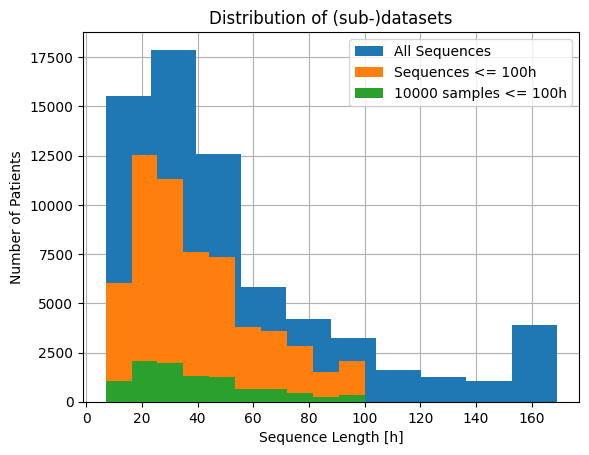

In [84]:
MAX_SEQ_LENGTH = 100
KEEP_NUM_IDS = 10000
# group patients by id
grouped = df_ts.groupby('id')
# get sequence length for each id
lengths = grouped.size()
assert(len(lengths) == 67056), f'Number of patients should be 67056. You are not using the full dataset. Current length {len(lengths)}.'
ax = lengths.hist(label='All Sequences', zorder=2)
# filter out too long seq lengths
keep = lengths[lengths <= MAX_SEQ_LENGTH]
ax = keep.hist(label=f'Sequences <= {MAX_SEQ_LENGTH}h', zorder=3)
# only keep 10000 random samples
keep = keep.sample(n=KEEP_NUM_IDS, random_state=42)
ax = keep.hist(label=f'{KEEP_NUM_IDS} samples <= 100h', zorder=4)
legend = ax.legend()
_ = ax.set(title='Distribution of (sub-)datasets', xlabel='Sequence Length [h]', ylabel='Number of Patients')

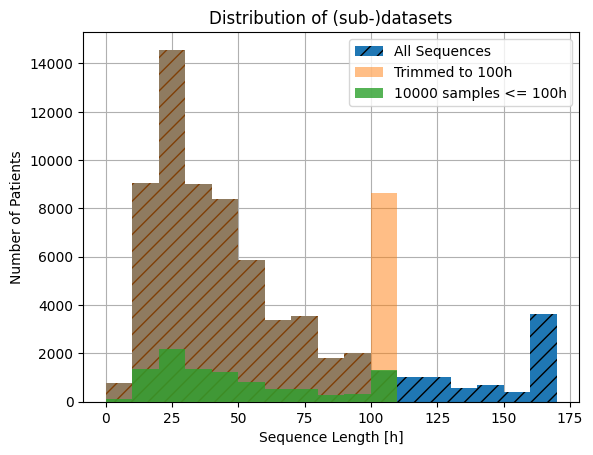

In [145]:
MAX_SEQ_LENGTH = 100
KEEP_NUM_IDS = 10000
density = False # param for hist plots
bins = np.arange(0,171, 10)
# group patients by id
grouped = df_ts.groupby('id')
lengths = grouped.size()
assert(len(lengths) == 67056), f'Number of patients should be 67056. You are not using the full dataset. Current length {len(lengths)}.'
ax = lengths.hist(label='All Sequences', zorder=2, alpha=1, density=density, bins=bins, hatch='//')
# trim all sequences to MAX_SEQ_LENGTH, keep last MAX_SEQ_LENGTH hours
df_trimmed = grouped.tail(MAX_SEQ_LENGTH)
trimmed_length = df_trimmed.groupby('id').size()
# get sequence length for each id
ax = trimmed_length.hist(label=f'Trimmed to {MAX_SEQ_LENGTH}h', zorder=3, alpha=0.5, density=density, bins=bins)
# only keep 10000 random samples
keep = trimmed_length.sample(n=KEEP_NUM_IDS, random_state=42)
ax = keep.hist(label=f'{KEEP_NUM_IDS} samples <= 100h', zorder=4, alpha=0.8, density=density, bins=bins)
legend = ax.legend()
_ = ax.set(title='Distribution of (sub-)datasets', xlabel='Sequence Length [h]', ylabel='Number of Patients')

### Filter the datasets

In [146]:
ids_to_keep = keep.index

df_ts_reduced = df_ts[df_ts['id'].isin(ids_to_keep)]
df_static_reduced = df_static[df_static['id'].isin(ids_to_keep)]

print('Expected number of patients: ', KEEP_NUM_IDS)
print('Number of patients in reduced dataset_ts: ', len(df_ts_reduced.groupby('id')))
print('Number of patients in reduced dataset_static: ', len(df_static_reduced.groupby('id')))

Expected number of patients:  10000
Number of patients in reduced dataset_ts:  10000
Number of patients in reduced dataset_static:  10000


### Save the new / reduced datasets

In [75]:
df_ts_reduced.to_parquet(path_ts)
df_static_reduced.to_parquet(path_static)